#### Zad 1
W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu) (1p.)

In [1]:
library(ggplot2)


data = read.csv("c_data.csv")
data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Size,Operation,Time
10,naive_multiplication,0
10,better_multiplication,0
10,GSL_multiplication,0
10,naive_multiplication,0
10,better_multiplication,0
10,GSL_multiplication,0
10,naive_multiplication,0
10,better_multiplication,0
10,GSL_multiplication,0
10,naive_multiplication,0


#### Zad 2, 3, 4
Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) (1p.)

Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 (1p.)

Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. (1p.)

In [2]:
grouped <- aggregate(Time ~ Size:Operation, data=data, FUN=mean)
grouped

Size,Operation,Time
10,better_multiplication,0.000
100,better_multiplication,0.006
190,better_multiplication,0.040
280,better_multiplication,0.135
370,better_multiplication,0.323
460,better_multiplication,0.590
10,GSL_multiplication,0.000
100,GSL_multiplication,0.001
190,GSL_multiplication,0.009
280,GSL_multiplication,0.022


In [3]:
grouped$StdDev <- aggregate(Time ~Size:Operation, data=data, FUN=sd)$Time
grouped

Size,Operation,Time,StdDev
10,better_multiplication,0.000,0.000000000
100,better_multiplication,0.006,0.005163978
190,better_multiplication,0.040,0.004714045
280,better_multiplication,0.135,0.026770631
370,better_multiplication,0.323,0.078038452
460,better_multiplication,0.590,0.072724747
10,GSL_multiplication,0.000,0.000000000
100,GSL_multiplication,0.001,0.003162278
190,GSL_multiplication,0.009,0.003162278
280,GSL_multiplication,0.022,0.004216370


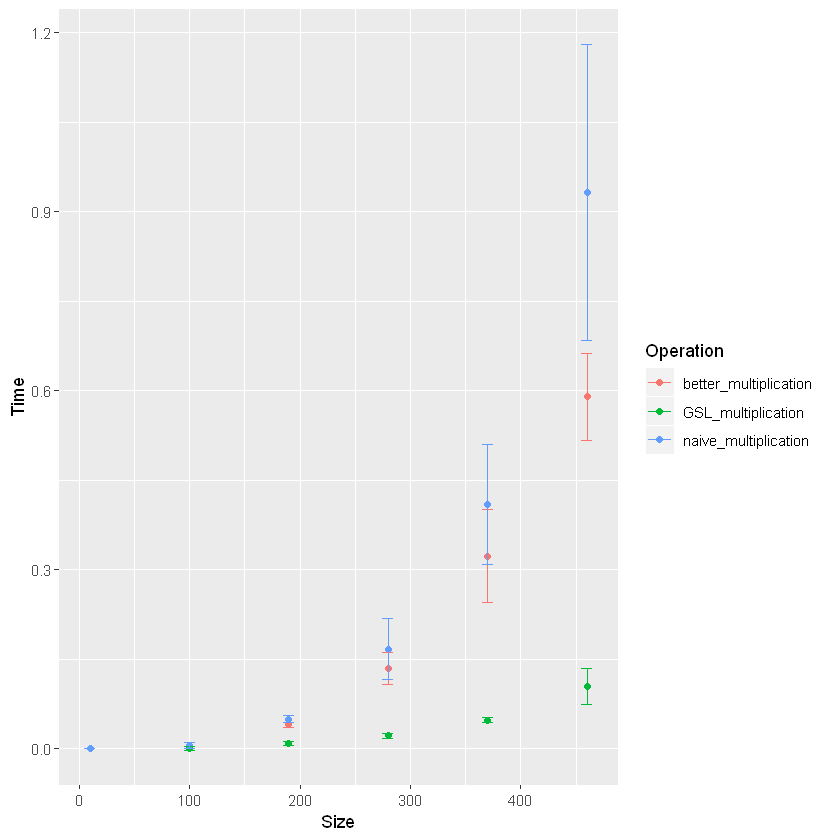

In [13]:
ggplot(grouped, aes(Size, Time)) + geom_point(aes(color=Operation)) + 
geom_errorbar(aes(ymin=Time-StdDev, ymax=Time+StdDev, width=10, color=Operation))

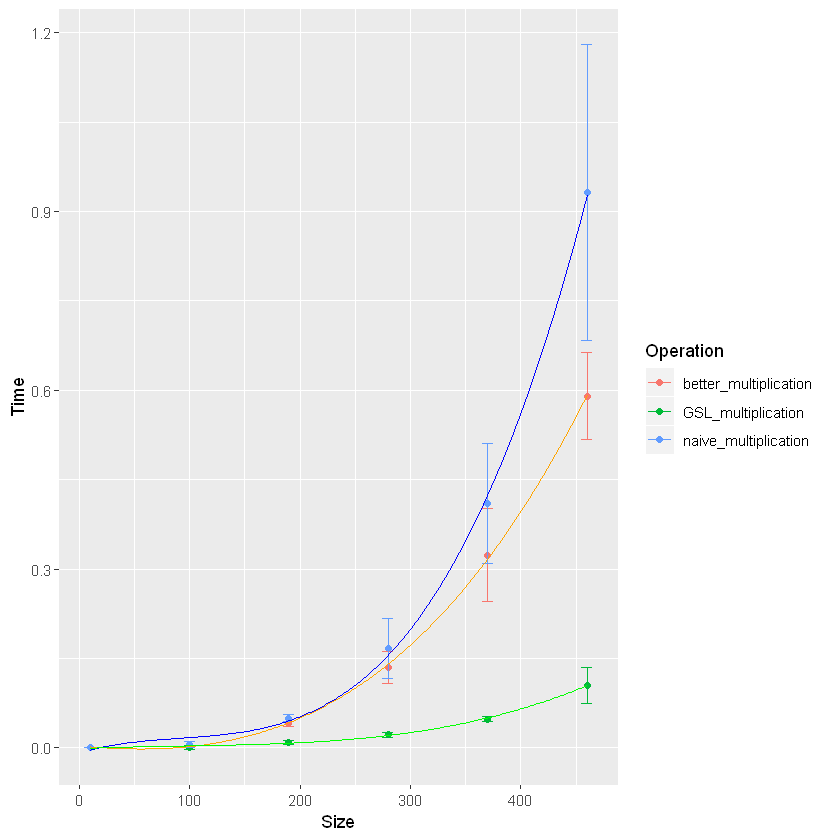

In [18]:
sizes <- unique(grouped[, "Size"]) 

operations = c("naive_multiplication", "better_multiplication", "GSL_multiplication")
colors = c("blue", "orange", "green")

for (i in 1:3) {
    times <- grouped[grouped$Operation == operations[i], "Time"]
    
    partial_data <- data.frame(sizes, times)
    
    fit <- lm(times ~ poly(sizes, 3, raw=TRUE), data=partial_data)
    
    partial_data = data.frame(sizes = seq(min(sizes), max(sizes), length.out=250))
    partial_data$times = predict(fit, partial_data)
    
    last_plot() + geom_line(data=partial_data, aes(sizes,times), color=colors[i])
}
last_plot()

#### Zad 5
Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem w Polsce. Przykładowe źródło danych https://ourworldindata.org/explorers/coronavirus-data-explorer. Dla każdej fali dopasować osobną krzywą (dane i aproksymacje pokazać na wykresach); porównać ich parametry krzywych. (2p.)

In [1]:
covid_data = read.csv("covid-data.csv")
covid_data = covid_data[covid_data$location == "Poland", c("date","new_cases")]

In [2]:
library(shiny)
library(ggplot2)

covid_data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


,date,new_cases
131240,2020-03-04,1
131241,2020-03-05,0
131242,2020-03-06,4
131243,2020-03-07,0
131244,2020-03-08,6
131245,2020-03-09,5
131246,2020-03-10,6
131247,2020-03-11,9
131248,2020-03-12,18
131249,2020-03-13,19


In [3]:
ui <- fluidPage(
  
  titlePanel("Approx example"),
  sidebarLayout(
    
    sidebarPanel(
      sliderInput(inputId = "degree",
                  label = h3("Approx degree:"),
                  min = 1, max = 5, value = 2),
      sliderInput("genRange",
                  label = h3("Approximation range:"), 
                  min = 0, max = 200, 
                  value = c(40, 160))
    ),
    
    mainPanel(
      plotOutput(outputId = "approxPlot")
    )
  )
)

In [4]:
server <- function(input, output) {
  # input - lista indeksowana przez inputId z inputow z ui
  x <- c(32,64,96,118,126,144,152.5,158)  
  y <- c(99.5,104.8,108.5,100,86,64,35.3,15)
  mydata <- data.frame(x,y)
  
  output$approxPlot <- renderPlot({
    fit <- lm(log(y) ~ x, data=mydata)
    newdata = data.frame(x = seq(input$genRange[1], input$genRange[2], length.out=250))
    newdata$y = exp(predict(fit, newdata))
    ggplot(mydata, aes(x,y)) + geom_point() + geom_line(data=newdata)
  })
  
}

In [ ]:
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:4412
